In [1]:
import numpy as np 
import pandas as pd 
import json 
import csv 
import random 
  
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import regularizers 
  
import pprint 
import tensorflow.compat.v1 as tf 
from tensorflow.python.framework import ops 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
tf.disable_eager_execution() 
  
# Reading the data 
data = pd.read_csv("news.csv") 
data.head() 

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
data = data.drop(["Unnamed: 0"], axis=1) 
data.head(5) 

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# encoding the labels 
le = preprocessing.LabelEncoder() 
le.fit(data['label']) 
data['label'] = le.transform(data['label']) 


In [4]:
'''
embedding_dim (integer): This variable determines the dimensionality of the word embeddings 
    used by the model. Word embeddings are numerical representations of words, where words 
    with similar meanings have similar embedding vectors. The embedding_dim specifies the 
    size of these vectors. Here, 50 indicates that each word will be represented by a 50-dimensional vector.

max_length (integer): This variable sets the maximum length (number of tokens) for each 
    text sequence. Sequences longer than max_length will be either truncated or padded 
    (depending on the trunc_type and padding_type settings). Here, 54 indicates that 
    all sequences will be capped at a maximum of 54 tokens.

trunc_type (string): This variable specifies how to handle sequences exceeding the max_length. 
    Here, trunc_type is set to "post". This means that if a sequence is longer than 54 tokens, 
    it will be truncated from the end (the "post" part) to fit within the maximum length.

padding_type (string): This variable determines how to handle sequences shorter than the 
    max_length. Here, padding_type is set to "post". This means that if a sequence is less 
    than 54 tokens long, it will be padded with additional tokens (usually zeros) at the end 
    (again, the "post" part) to make it reach the maximum length. Padding helps the model process 
    sequences of different lengths uniformly.

oov_tok (string): This variable stands for "out-of-vocabulary token." It defines a special 
    token used to represent words that the model doesn't recognize during training. Here, 
    oov_tok is set to <OOV>. This token allows the model to handle unseen words gracefully without crashing.

training_size (integer): This variable specifies the number of samples from the original data that 
    will be used for training the model. Here, 3000 indicates that 3000 data points will be used for training.

test_portion (float): This variable defines the proportion of the data that will be reserved for testing 
    the model's performance. Here, test_portion is set to 0.1 (or 10%). This means that 10% of the 
    original data will be held out for evaluating the model's accuracy after training.
'''

# necessary variables
embedding_dim = 50
max_length = 54
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 3000
test_portion = .1

In [5]:
'''
Data preprocessing:
Separation of Concerns: The code separates the data (title, text, and labels) into individual lists. 
    This makes it easier to handle each part independently. When performing tokenization, you 
    might want different tokenization strategies for titles (e.g., separating by words) and 
    text bodies (e.g., handling punctuation or emojis differently).

Memory Management: By separating data into lists, you can avoid working with a large, cumbersome data 
    structure. This can improve processing speed and memory efficiency, especially when dealing with 
    extensive datasets. Tokenization often involves creating new pieces of data (tokens) from the 
    original text, and having separate lists allows for efficient handling of these new elements.

Pipeline Flexibility: Separating data allows for building a more flexible pipeline. You might want 
    to perform different pre-processing steps on titles, text, and labels before feeding them into 
    a tokenization process. This code snippet makes it easier to add those steps in the future without 
    affecting the core logic of tokenization.
'''
# data preprocessing
title = [] 
text = [] 
labels = [] 
for x in range(training_size): 
    title.append(data['title'][x]) 
    text.append(data['text'][x]) 
    labels.append(data['label'][x]) 
    

In [6]:
'''
Tokenizer Setup (tokenizer1 = Tokenizer()): This line creates a tokenizer object. A tokenizer 
    is a tool that breaks down text data into sequences of elements (usually words).

Fitting the Tokenizer (tokenizer1.fit_on_texts(title)): Here, the tokenizer is "fitted" on the 
    title data. This process allows the tokenizer to learn the vocabulary of words present in 
    the titles. It creates a mapping between each unique word and a unique integer index.

Creating Sequences (sequences1 = tokenizer1.texts_to_sequences(title)): This line uses the 
    fitted tokenizer to convert the title data (list of strings) into sequences of integers. 
    Each integer in a sequence represents a word based on the mapping learned during the 
    fitting process. Now, sequences1 is a list of lists, where each inner list represents 
    a sequence of word indexes for a corresponding title in the original title data.

Padding Sequences (padded1 = pad_sequences(...)): This line takes the sequences1 
    (list of integer sequences) and applies padding. Remember the max_length variable 
    defined earlier? Padding ensures all sequences have the same length (max_length) by 
    adding special tokens (usually zeros) either at the beginning or end (based on padding_type) 
    of shorter sequences. This allows the model to process sequences of varying lengths uniformly.

Splitting Data (split = ..., training_sequences1, test_sequences1): Here, the padded sequences 
    (padded1) are split into training and testing sets based on the test_portion. The 
    training_sequences1 holds padded sequences for training the model, and test_sequences1 
    holds sequences for evaluating the model's performance after training.
'''
# tokenizer
tokenizer1 = Tokenizer() 
tokenizer1.fit_on_texts(title) 
word_index1 = tokenizer1.word_index 
vocab_size1 = len(word_index1) 
sequences1 = tokenizer1.texts_to_sequences(title) 
padded1 = pad_sequences( 
    sequences1,  padding=padding_type, truncating=trunc_type) 

# test/train split
split = int(test_portion * training_size) 
training_sequences1 = padded1[split:training_size] 
test_sequences1 = padded1[0:split] 
test_labels = labels[0:split] 
training_labels = labels[split:training_size] 

In [8]:
'''
Word embeddings are a numerical representation of words that captures their semantic 
    relationships. It allows us to represent words as vectors in a high-dimensional 
    space, where similar words are positioned close to each other. There are two main 
    approaches for generating word embeddings:

Learning from scratch: This involves training a model on a large corpus of text data 
    to learn the word embeddings.

Using pre-trained embeddings: Pre-trained word embeddings are vectors that have been 
    learned on a massive dataset of text and can be directly applied to new tasks.
    
Below, glove.6B.50d.txt is a pre-trained word embedding file
'''


# store word embeddings in dictionary
embeddings_index = {}
with open('glove.6B.50d.txt', 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs # word/value pair where value is embedding vector

# Generating embeddings
embeddings_matrix = np.zeros((vocab_size1+1, embedding_dim)) # embedding_dim is dimension of word vectors
for word, i in word_index1.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector  # assigns existing embedding vector to word if exists

In [9]:
'''
model parameters:
vocab_size1+1: The size of the vocabulary (number of words) + 1 for padding.
embedding_dim: The dimensionality of the word vectors (e.g., 50 for GloVe).
input_length: The maximum length of sequences considered (sentences or text snippets).
weights=[embeddings_matrix]: This argument tells the layer to use the pre-trained word 
    embedding matrix you created earlier (embeddings_matrix).
trainable=False: This freezes the pre-trained word embeddings, preventing them from being 
    updated during training. You want the model to learn the relationships between these 
    pre-trained vectors, not alter them.
'''
# set up model
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(vocab_size1+1, embedding_dim, 
                              input_length=max_length, weights=[ 
                                  embeddings_matrix], 
                              trainable=False), 
    tf.keras.layers.Dropout(0.2), # drop neurons during training to prevent overfitting
    tf.keras.layers.Conv1D(64, 5, activation='relu'), # kernel size 5, outputs 64 feature maps
    tf.keras.layers.MaxPooling1D(pool_size=4), # reduce dimensionality of data
    tf.keras.layers.LSTM(64), # recurrent layer with 64 hidden units
    tf.keras.layers.Dense(1, activation='sigmoid') # turns the LSTM output into binary classification
])                                                 # 64 -> 1 value that can be used as probability score
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 50)            377600    
                                                                 
 dropout (Dropout)           (None, 54, 50)            0         
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            16064     
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 64)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

Train on 2700 samples, validate on 300 samples
Epoch 1/50
2700/2700 [==============================] - 1s 220us/sample - loss: 0.0202 - accuracy: 0.9922 - val_loss: 1.3402 - val_accuracy: 0.7100
Epoch 2/50
2700/2700 [==============================] - 1s 222us/sample - loss: 0.0262 - accuracy: 0.9907 - val_loss: 1.0542 - val_accuracy: 0.7167
Epoch 3/50
2700/2700 [==============================] - 1s 219us/sample - loss: 0.0323 - accuracy: 0.9874 - val_loss: 1.0609 - val_accuracy: 0.7367
Epoch 4/50
2700/2700 [==============================] - 1s 224us/sample - loss: 0.0236 - accuracy: 0.9907 - val_loss: 1.4021 - val_accuracy: 0.7100
Epoch 5/50
2700/2700 [==============================] - 1s 218us/sample - loss: 0.0173 - accuracy: 0.9956 - val_loss: 1.2533 - val_accuracy: 0.7100
Epoch 6/50
2700/2700 [==============================] - 1s 221us/sample - loss: 0.0226 - accuracy: 0.9930 - val_loss: 1.2197 - val_accuracy: 0.7167
Epoch 7/50
2700/2700 [==============================] - 1s 219us/

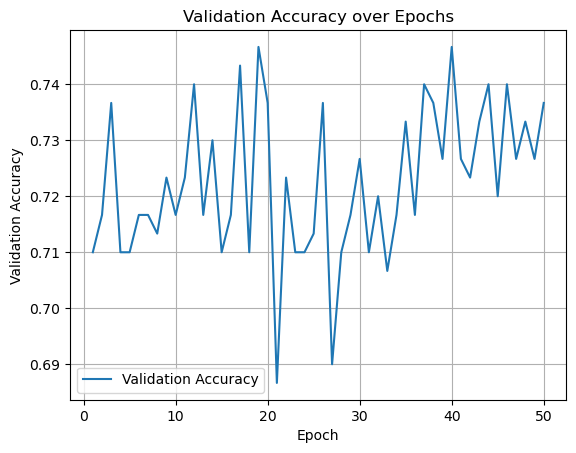

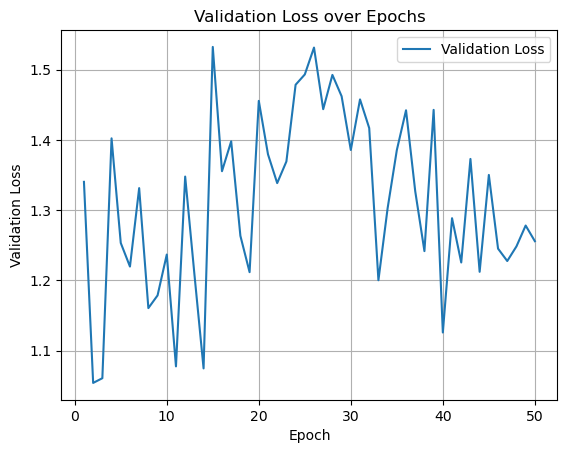

In [15]:
import matplotlib.pyplot as plt

num_epochs = 50   # the entire dataset will be split into batches and trained on 50 times
                  # epoch value too high and it overfits
training_padded = np.array(training_sequences1)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences1)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

# Access accuracy and loss history from training
acc_history = history.history['val_accuracy']
loss_history = history.history['val_loss']

# Plot validation accuracy
plt.plot(range(1, num_epochs + 1), acc_history, label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot validation loss (if desired)
plt.plot(range(1, num_epochs + 1), loss_history, label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

In [11]:

# sample text to check if fake or not 
X = "Karry to go to France in gesture of sympathy"
  
# detection 
sequences = tokenizer1.texts_to_sequences([X])[0] # convert text to sequence of tokens
sequences = pad_sequences([sequences], maxlen=54, # pad the sequence
                          padding=padding_type,  
                          truncating=trunc_type) 
if(model.predict(sequences, verbose=0)[0][0] >= 0.5): # predict 
    print("This news is True") 
else: 
    print("This news is false")

This news is false


C:\Users\justi\AppData\Roaming\Python\Python39\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
